In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [2]:
df_2018 = pd.read_csv('2018.csv', index_col=0)

### Fill missing value by -1

In [3]:
df_2018.fillna(-1, inplace=True)
df_2018.isnull().sum()

code    0
dia     0
cd      0
hoa     0
khtn    0
khxh    0
su      0
anh     0
van     0
sinh    0
toan    0
li      0
city    0
dtype: int64

In [4]:
df_2018.index

Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              ...
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             dtype='float64', length=744396)

In [5]:
df_2018.reset_index(drop=True, inplace=True)

In [6]:
df_2018.index

RangeIndex(start=0, stop=744396, step=1)

In [7]:
df_2018.head()

,code,dia,cd,hoa,khtn,khxh,su,anh,van,sinh,toan,li,city
0,18010226,6.50,8.25,-1.0,-1.00,5.92,3.0,3.0,3.75,-1.0,3.0,-1.00,18
1,18010229,9.00,8.25,-1.0,-1.00,7.75,6.0,9.0,7.50,-1.0,8.8,-1.00,18
2,18010232,-1.00,-1.00,5.5,5.42,-1.00,-1.0,4.0,5.50,5.0,6.0,5.75,18
3,18010242,4.75,7.25,-1.0,-1.00,5.17,3.5,2.6,5.75,-1.0,3.4,-1.00,18
4,18010247,6.25,8.00,-1.0,-1.00,5.92,3.5,3.0,6.75,-1.0,3.8,-1.00,18


# Cá nhân
#### Phân tích top 100 thí sinh cao điểm nhất cả nước.

In [8]:
def top_100_comb(subject,data): # top 100 thí sinh cao điểm nhất theo từng tổ hợp môn.
    df = pd.DataFrame({'diem': data[subject].sum(axis=1),
                  'city': df_2018.city.values})
    return df.sort_values(by='diem',ascending = False).head(100)

###### Điểm khối A00 ( toán , lí, hóa).

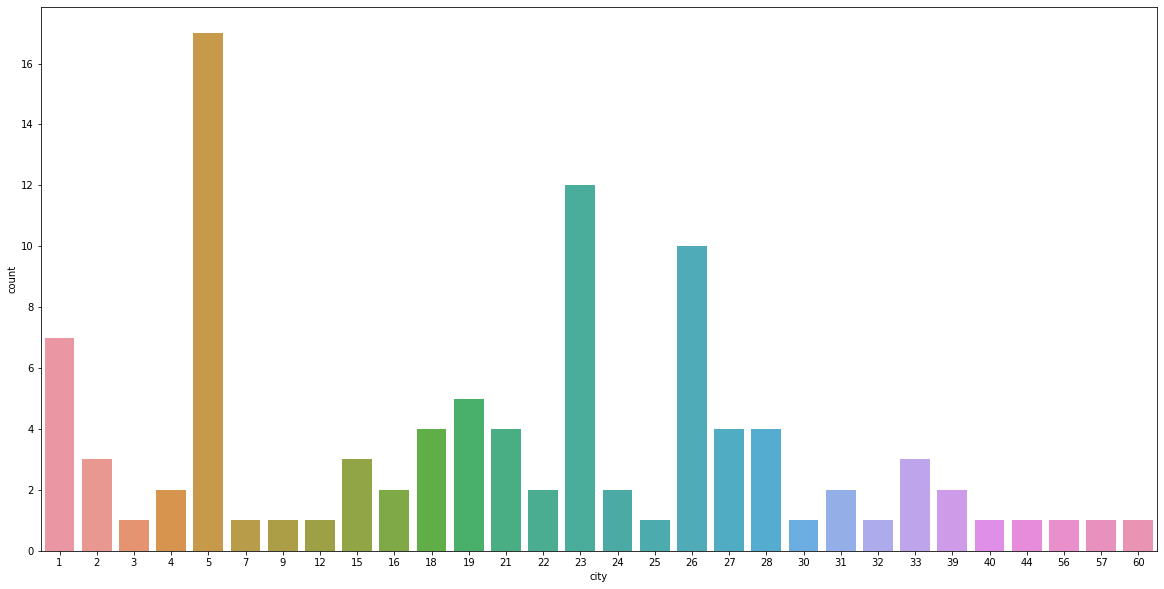

In [17]:
plt.figure(figsize=(20,10))
top_100_A00 = top_100_comb(['toan','li','hoa'],df_2018)
sns.countplot(data = top_100_A00, x = 'city')

###### Điểm khối A01 (toán, lí, anh).

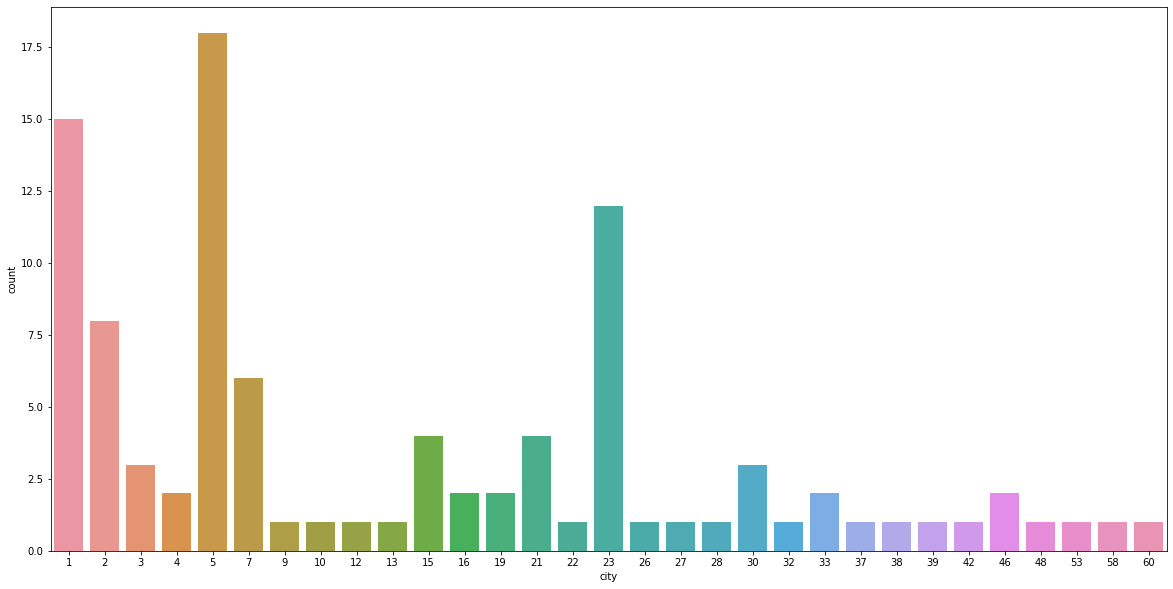

In [24]:
plt.figure(figsize=(20,10))
top_100_A01 = top_100_comb(['toan','li','anh'],df_2018)
#sns.countplot(data = top_100_A01, x = 'city',hue = 'city',dodge = False)
sns.countplot(data = top_100_A01, x = 'city')

- Biểu đồ countplot ( biểu đồ dạng cột, biểu diễn số lượng quan sát của từng loại).
- Khi sử dụng biểu đồ này, có thể quan sát được sự tương quan giữa số lượng học sinh có điểm top 100 của tổ hợp môn. Cũng dễ dàng thấy được tỉnh nào có lượng học sinh trong top cao nhất.
- Hà Giang ( mã tỉnh 5) có số lượng học sinh thuộc top là cao nhất trong tổ hợp khối A ( A00( toán, lí hóa) và A01( toán, lí, anh)), theo sau là Hà Nội(1), Hòa Bình(23).Có thể nhận ra vấn đề ở đây chính là tại sao Hà Giang và Hòa Bình lại có lượng thí sih top đầu cao như vậy, cao hơn cả Hà Nội lẫn Tp Hồ Chí Minh.